# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model. As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. 

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# Build a multiple linear regression model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [52]:
# Imports
# Packages for numerics + dataframes
import pandas as pd 
import numpy as np

# Packages for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Packages for date conversions for calculating trip durations
import math
import datetime

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error


**Note:** `Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe 
df=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


* **Understanding Data Structure:** Helps identify the size of the dataset, data types and distribution off each feature.
* **Missing and Outlier:** Identifies missing, inconsistent, or outlier values that might distort the regression results.
* **Assessing Relationships Between Variables** Explores correlation between independent variables and dependent variable using correlation matrics or scatterplots.

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [3]:
# Start with `.shape` and `.info()`
print(df.shape)

print('***********************')
print(df.info())

(22699, 18)
***********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount        

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [4]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
df.dropna(inplace = True)

In [5]:
df.drop_duplicates(inplace = True)

Use `.describe()`.

In [6]:
# Use .describe()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,22699.0,5.675849e+07,3.274493e+07,12127.0,28520556.00,56731504.00,85374524.00,1.134863e+08
VendorID,22699.0,1.556236e+00,4.968384e-01,1.0,1.00,2.00,2.00,2.000000e+00
passenger_count,22699.0,1.642319e+00,1.285231e+00,0.0,1.00,1.00,2.00,6.000000e+00
trip_distance,22699.0,2.913313e+00,3.653171e+00,0.0,0.99,1.61,3.06,3.396000e+01
RatecodeID,22699.0,1.043394e+00,7.083909e-01,1.0,1.00,1.00,1.00,9.900000e+01
PULocationID,22699.0,1.624124e+02,6.663337e+01,1.0,114.00,162.00,233.00,2.650000e+02
DOLocationID,22699.0,1.615280e+02,7.013969e+01,1.0,112.00,162.00,233.00,2.650000e+02
payment_type,22699.0,1.336887e+00,4.962111e-01,1.0,1.00,1.00,2.00,4.000000e+00
fare_amount,22699.0,1.302663e+01,1.324379e+01,-120.0,6.50,9.50,14.50,9.999900e+02
extra,22699.0,3.332746e-01,4.630966e-01,-1.0,0.00,0.00,0.50,4.500000e+00


### Task 2b. Convert pickup & dropoff columns to datetime


In [7]:
# Check the format of the data
type(df)

pandas.core.frame.DataFrame

In [8]:
# Convert datetime columns to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [9]:
# Create `duration` column
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

In [10]:
df['duration'].head()

0    14.066667
1    26.500000
2     7.200000
3    30.250000
4    16.716667
Name: duration, dtype: float64

### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [11]:
### YOUR CODE HERE ###
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

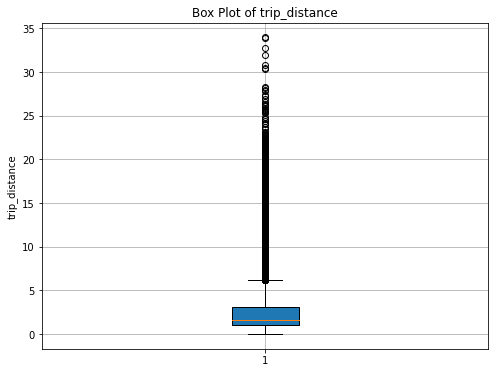

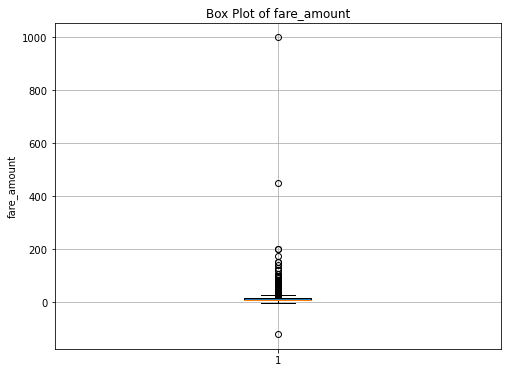

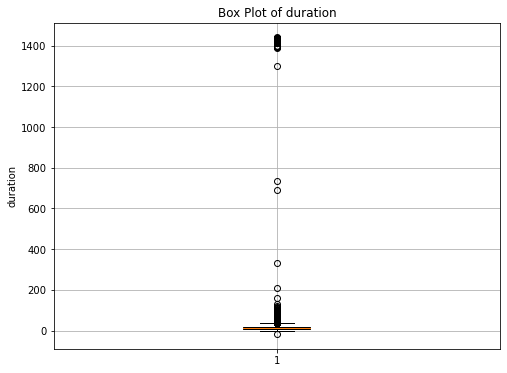

In [12]:
features = df[['trip_distance', 'fare_amount', 'duration']]

for feature in features:
    plt.figure(figsize=(8,6))
    plt.boxplot(df[feature], vert=True, patch_artist=True)
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)
    plt.grid(True)
    plt.show()

**Questions:** 
1. Which variable(s) contains outliers? 

2. Are the values in the `trip_distance` column unbelievable?

3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?

1. According to the box plots of **trip_distance, mouse_amount and duration variables**, all three have outliers. Especially **trip_distance and mouse_amount** have extremely high values.
2. While typical taxi rides in New York are usually below this limit, extremely large distances such as 33.96 miles can be unreasonable or unusual. Therefore, some values may not be credible and may require further investigation.
3. These values do not make sense, because negative or zero distance, fee or duration would not make sense in the real world. There are probably data entry errors or recording problems.

### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [13]:
# Are trip distances of 0 bad data or very short trips rounded down?
df["trip_distance"].drop_duplicates().sort_values().head(10)

128      0.00
2985     0.01
323      0.02
3158     0.03
1510     0.04
10146    0.05
4423     0.06
922      0.07
4623     0.08
22035    0.09
Name: trip_distance, dtype: float64

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [14]:
zero_or_negative_values = {
    "trip_distance": df[df["trip_distance"] <= 0].shape[0],
    "fare_amount": df[df["fare_amount"] <= 0].shape[0],
    "duration": df[df["duration"] <= 0].shape[0],
}

print(zero_or_negative_values)

{'trip_distance': 148, 'fare_amount': 20, 'duration': 27}


#### `fare_amount` outliers

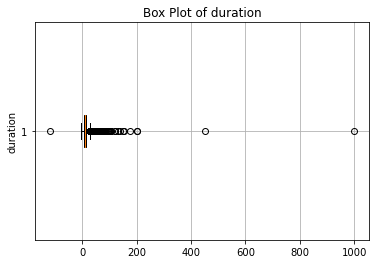

In [15]:
plt.boxplot(df['fare_amount'], vert=False, patch_artist=True)
plt.title(f'Box Plot of {feature}')
plt.ylabel(feature)
plt.grid(True)
plt.show()

**Question:** What do you notice about the values in the `fare_amount` column?

Impute values less than $0 with `0`.

In [16]:
# Impute values less than $0 with 0
df[df['fare_amount'] < 0].shape[0]

14

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [17]:
def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df.loc[df[col] < 0, col] = 0

        # Calculate upper threshold
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_threshold = Q3 + (iqr_factor * IQR)
        print(col)
        print('Q3:', Q3)
        print('Upper Threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())
        print()

In [18]:
# Upper bound outlier correction in certain columns
outlier_imputer(['fare_amount'], 6)

fare_amount
Q3: 14.5
Upper Threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



#### `duration` outliers


In [19]:
df['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [20]:
# Impute a 0 for any negative values
df.loc[df['duration'] < 0, 'duration'] = 0
df['duration'].min()

0.0

In [21]:
# Impute the high outliers
outlier_imputer(['duration'], 6)

duration
Q3: 18.383333333333333
Upper Threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64



In [22]:
df['duration'].describe()

count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [23]:
df.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'duration'],
      dtype='object')

In [24]:
# Create `pickup_dropoff` column
df['pickupp_dropoff'] = df['PULocationID'].astype(str)+' '+df['DOLocationID'].astype(str)
df['pickupp_dropoff'].head()

0    100 231
1     186 43
2    262 236
3     188 97
4      4 112
Name: pickupp_dropoff, dtype: object

Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [25]:
grouped = df.groupby('pickupp_dropoff').mean()[['trip_distance']]
grouped.head(10)

,trip_distance
pickupp_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000
100 113,2.024000
100 114,1.940000
100 12,4.550000
100 125,2.840000


`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [26]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [27]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df['mean_distance'] = df['pickupp_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_distance']]


,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [28]:
grouped = df.groupby('pickupp_dropoff').mean()[['duration']]
grouped

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

df['mean_duration'] = df['pickupp_dropoff']
df['mean_duration'] = df['mean_duration'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [29]:
df.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'duration',
       'pickupp_dropoff', 'mean_distance', 'mean_duration'],
      dtype='object')

In [30]:
# Create 'day' col
df['day'] = df['tpep_pickup_datetime'].dt.day_name().str.lower()

# Create 'month' col
df['month'] = df['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [31]:
# Create 'rush_hour' col
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df.loc[df['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0

In [32]:
def rush_hour(hour):
    if 6 <= hour['rush_hour'] <10:
        val = 1
    elif 16 <= hour['rush_hour'] <20:
        val = 1
    else:
        val = 0
    return val

In [33]:
# Apply the `rush_hourizer()` function to the new column
df.loc[(df.day != 'saturday') & (df.day != 'sunday'), 'rush_hour'] = df.apply(rush_hour, axis=1)
df[df['rush_hour'] == 1]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickupp_dropoff,mean_distance,mean_duration,day,month,rush_hour
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.00,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,dec,1
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,...,0.00,0.3,59.16,59.633333,79 241,12.830000,59.633333,wednesday,may,1
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,...,0.00,0.3,19.58,21.983333,237 114,4.022500,26.437500,tuesday,aug,1
12,46782248,1,2017-06-09 19:00:26,2017-06-09 19:20:11,1,3.00,1,N,13,148,...,0.00,0.3,20.15,19.750000,13 148,3.307500,15.058333,friday,jun,1
15,47444401,2,2017-06-02 06:41:39,2017-06-02 06:57:47,1,5.93,1,N,239,231,...,0.00,0.3,22.80,16.133333,239 231,5.950000,17.166667,friday,jun,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22681,56013080,2,2017-06-09 18:24:49,2017-06-09 18:36:15,1,1.79,1,N,234,144,...,0.00,0.3,12.30,11.433333,234 144,1.622500,12.016667,friday,jun,1
22683,65803597,2,2017-08-03 17:30:04,2017-08-03 17:41:52,1,1.17,1,N,107,170,...,0.00,0.3,12.36,11.800000,107 170,1.001429,8.030952,thursday,aug,1
22684,65789688,1,2017-08-03 16:36:32,2017-08-03 16:46:23,2,1.20,1,N,68,50,...,0.00,0.3,11.75,9.850000,68 50,1.534444,10.196296,thursday,aug,1
22686,9039930,2,2017-02-08 18:13:26,2017-02-08 19:34:11,5,10.64,1,N,170,70,...,5.54,0.3,74.18,80.750000,170 70,10.640000,80.750000,wednesday,feb,1


### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

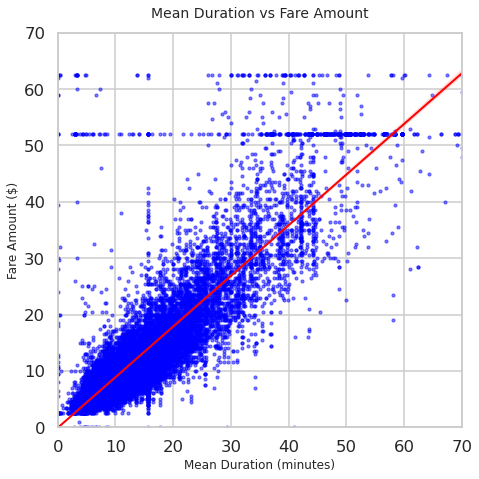

In [34]:
# Create a scatterplot to visualize the relationship between variables of interest

sns.set(style='whitegrid', context='talk')
fig, ax = plt.subplots(figsize=(7, 7))  # For a more dynamic approach we used plt.subplots.

# Regression graph
sns.regplot(
    x=df['mean_duration'], 
    y=df['fare_amount'], 
    scatter_kws={'alpha': 0.5, 's': 10, 'color': 'blue'},  # We slightly increased the dot sizes and added color.
    line_kws={'color': 'red', 'linewidth': 2},  # We added an aesthetic touch to the thickness of the line.
    ax=ax
)

# Axis boundaries and explanations
ax.set_xlim(0, 70)
ax.set_ylim(0, 70)
ax.set_title('Mean Duration vs Fare Amount', fontsize=14, pad=15)  # The title has been made more readable.
ax.set_xlabel('Mean Duration (minutes)', fontsize=12)
ax.set_ylabel('Fare Amount ($)', fontsize=12)

# visualize
plt.tight_layout()  # Provides a more organized look.
plt.show()

The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [35]:
df[df['fare_amount'] > 50]['fare_amount'].value_counts().head()

52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: fare_amount, dtype: int64

Examine the first 30 of these trips.

In [36]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)
df[df['fare_amount'] == 52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickupp_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,sunday,mar,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,saturday,jun,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,saturday,nov,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,wednesday,dec,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,sunday,sep,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,58.246032,tuesday,feb,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,monday,jun,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,58.246032,thursday,aug,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,tuesday,sep,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,sunday,apr,0


**Question:** What do you notice about the first 30 trips?

* We derived variables by doing dataframe feature engineering. The names of the variables we derived are duration, pickupp_dropoff, mean_distance, mean_duration, day, month, and rush_hour.

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [38]:
df_model = df[['VendorID', 'passenger_count', 'fare_amount', 'mean_distance', 'mean_duration', 'rush_hour']]
df_model.head()

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
0,2,6,13.0,3.521667,22.847222,0
1,1,1,16.0,3.108889,24.470370,0
2,1,1,6.5,0.881429,7.250000,1
3,2,1,20.5,3.700000,30.250000,0
4,2,1,16.5,4.435000,14.616667,0


### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

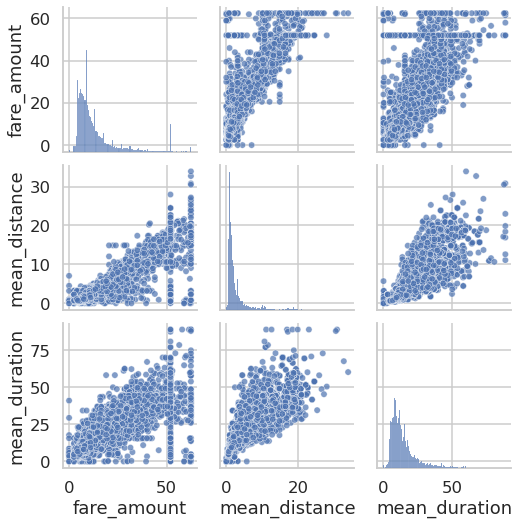

In [39]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df_model[['fare_amount', 'mean_distance', 'mean_duration']], plot_kws={'alpha':0.7, 'size': 7})

These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [40]:
# Correlation matrix to help determine most correlated variables
df_model.corr(method = 'pearson')

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.002874
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.022035
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.020075
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,-0.039725
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,-0.021583
rush_hour,-0.002874,-0.022035,-0.020075,-0.039725,-0.021583,1.000000


In [41]:
def correlation_matrix(df,cols):
    fig = plt.gcf()
    fig.set_size_inches(10,8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    mask = np.triu(np.ones_like(df[cols].corr(), dtype = bool))
    fig = sns.heatmap(df[cols].corr(), mask= mask,  annot = True, linewidths=0.5, annot_kws= {'size': 9},cbar_kws={'shrink': 0.8},  linecolor='w', cmap='coolwarm', fmt = '.3f')
    plt.show(block=True)

Visualize a correlation heatmap of the data.

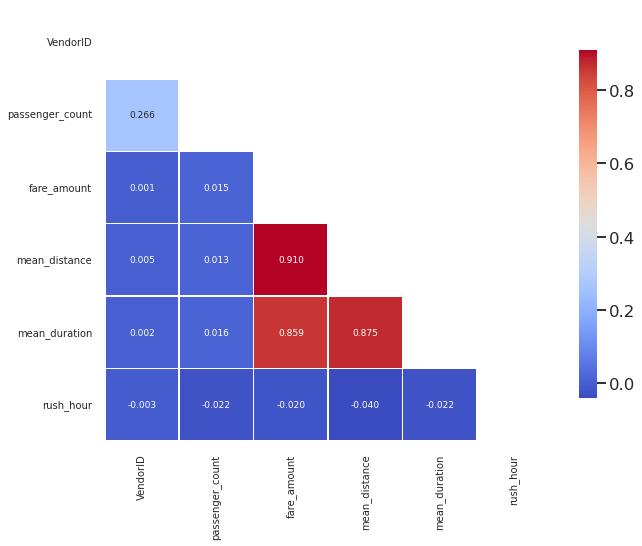

In [42]:
# Create correlation heatmap
num_cols = [col for col in df_model.columns if df_model[col].dtypes != "O"]
correlation_matrix(df_model, num_cols)

**Question:** Which variable(s) are correlated with the target variable of `fare_amount`? 

Try modeling with both variables even though they are correlated.

* The variables mean_distance (0.910) and mean_duration (0.859) are highly correlated with fare_amount. Other variables show negligible correlation.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.


### Task 8a. Split data into outcome variable and features

In [79]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.7 MB


Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [43]:
# Remove the target column from the features
X = df_model.drop(columns='fare_amount')
### YOUR CODE HERE ###

# Set y variable
y = df_model[['fare_amount']]

# Display first few rows
X.head()


,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


### Task 8b. Pre-process data


Dummy encode categorical variables

In [44]:
# Convert VendorID to string
X['VendorID'] = X['VendorID'].astype(str)

# Get dummies
X = pd.get_dummies(X, drop_first = True)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,1
1,1,3.108889,24.470370,0,0
2,1,0.881429,7.250000,1,0
3,1,3.700000,30.250000,0,1
4,1,4.435000,14.616667,0,1


### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [45]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.8, random_state = 0)

### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [48]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[-0.5031251   0.52502478  1.37664477 -0.64241607  0.89389527]
 [ 1.03419218 -0.62770489 -0.87927095 -0.64241607  0.89389527]
 [-0.5031251  -0.32542333 -0.47658323 -0.64241607 -1.11869929]
 ...
 [-0.5031251  -0.45009888 -0.67027731 -0.64241607 -1.11869929]
 [-0.5031251  -0.59240704 -0.85001834  1.55662356 -1.11869929]
 [ 1.80285082  0.87578738  1.15287442 -0.64241607  0.89389527]]


### Fit the model

Instantiate your model and fit it to the training data.

In [49]:
# Fit your model to the training data
LR = LinearRegression()
LR.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [59]:
# Evaluate the model performance on the training data
model = LR.score(X_train_scaled, y_train)
print('Coefficient of determinacy', model)

y_pred_train = LR.predict(X_train_scaled)

print('R2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determinacy 0.8390165799992433
R2: 0.8390165799992433
MAE: 2.1510208169849636
MSE: 17.80866783047517
RMSE: 4.220031733349309


### Test data

Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [60]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [61]:
# Evaluate the model performance on the testing data
model_test = LR.score(X_test_scaled, y_test)
print('Coefficient of determinacy:', model_test)

y_pred_test = LR.predict(X_test_scaled)

print('R2:', r2_score(y_test,  y_pred_test))
print('MAE:', mean_absolute_error(y_test, y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determinacy: 0.8467602412214753
R2: 0.8467602412214753
MAE: 2.17893860888739
MSE: 17.044666543025016
RMSE: 4.128518686287494


<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [62]:
# Create a `results` dataframe
results = pd.DataFrame(data= {'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})

results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
5818,14.0,12.443300,1.556700
18134,28.0,16.444831,11.555169
4655,5.5,6.713795,-1.213795
7378,15.5,16.393355,-0.893355
13914,9.5,10.501274,-1.001274


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

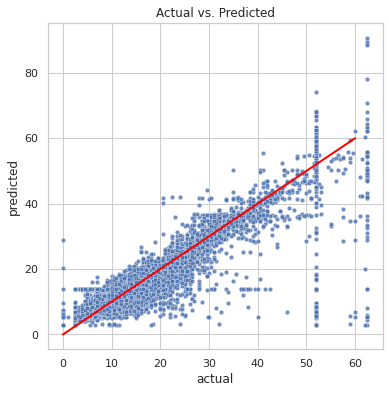

In [70]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6,6))
sns.set(style='whitegrid')
sns.scatterplot(x = 'actual', 
                y = 'predicted', 
                data = results, 
                s=20, 
                alpha=0.8, 
                ax=ax)

plt.plot([0,60], [0,60], c= 'red', linewidth=2)
plt.title('Actual vs. Predicted');

Visualize the distribution of the `residuals` using a histogram.

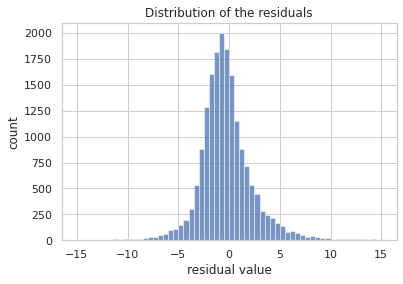

In [74]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

In [75]:
# Calculate residual mean
results.residual.mean()

-0.053643434751811644

Create a scatterplot of `residuals` over `predicted`.

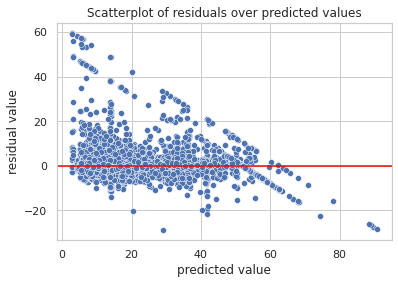

In [76]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x='predicted', y= 'residual', data = results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [77]:
# Output the model's coefficients
coefficients = pd.DataFrame(LR.coef_, columns = X.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.030824,7.088735,2.807614,0.086693,-0.014688


What do these coefficients mean? How should they be interpreted?

* The coefficients show the effect of each independent variable on the target variable. A positive coefficient means an increase, a negative coefficient means a decrease. A 7.088735 coefficient for 'mean_distance' means that a 1 unit increase in 'mean_distance' brings about an increase of about 7.09 units in 'target'. Similarly, a -0.014688 coefficient for 'VendorID_2' shows an average decrease of 0.0147 units for a 1 unit increase in this value (or in this category), other things being equal.

### Task 9d. Conclusion

1. What are the key takeaways from this notebook?



2. What results can be presented from this notebook?



==> ENTER YOUR RESPONSE HERE 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 